In [1]:
import json
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import torch

In [2]:
plt.rcParams.update({
    'font.size': 32,            # General font size
    'axes.titlesize': 30,       # Title font size
    'legend.fontsize': 26,      # Font size for legend text
    'lines.linewidth': 3,       # Line width for all plots
    'lines.markersize': 14,     # Marker size for all plots
    "text.usetex": False,
})

## Laoding the result of analysis for different fine-tunings: place, sentiment, color

In [3]:
analysis_dir = "/home/khayatan/xl_vlms_cvpr/xl-vlms/results/analysis"
analysis_paths = ["analyse_clusters_place_dog_analysis.pth", "analyse_clusters_color_dog_analysis.pth", "analyse_clusters_sentiment_dog_analysis.pth"]

loaded_analysis = []
for path in analysis_paths:
    loaded_analysis.append(torch.load(os.path.join(analysis_dir, path)))

In [4]:
print(loaded_analysis[0].keys())
print(loaded_analysis[0]["recovery_metrics"].keys())
print(loaded_analysis[0]["shift_stats"].keys())

dict_keys(['recovery_metrics', 'shift_stats', 'per_sample_shift', 'shifted_components', 'shift_text_grounding', 'shifted_components_text_grounding'])
dict_keys(['word_intersection_original', 'word_intersection_shifted', 'mas_intersection_original', 'mas_intersection_shifted', 'improved_distance', 'improved_cosine', 'normalized_improved_distance', 'normalized_improved_cosine'])
dict_keys(['cosine_sim_scores', 'dot_prod_scores', 'average_cosine_sim_w_mean_scores', 'average_dot_product_w_mean_scores', 'mag_mean_shift_score'])


## Change of concepts from original to fine-tuned, measured with word overlap

/tmp/ipykernel_423066/1121868584.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(0,100,20))


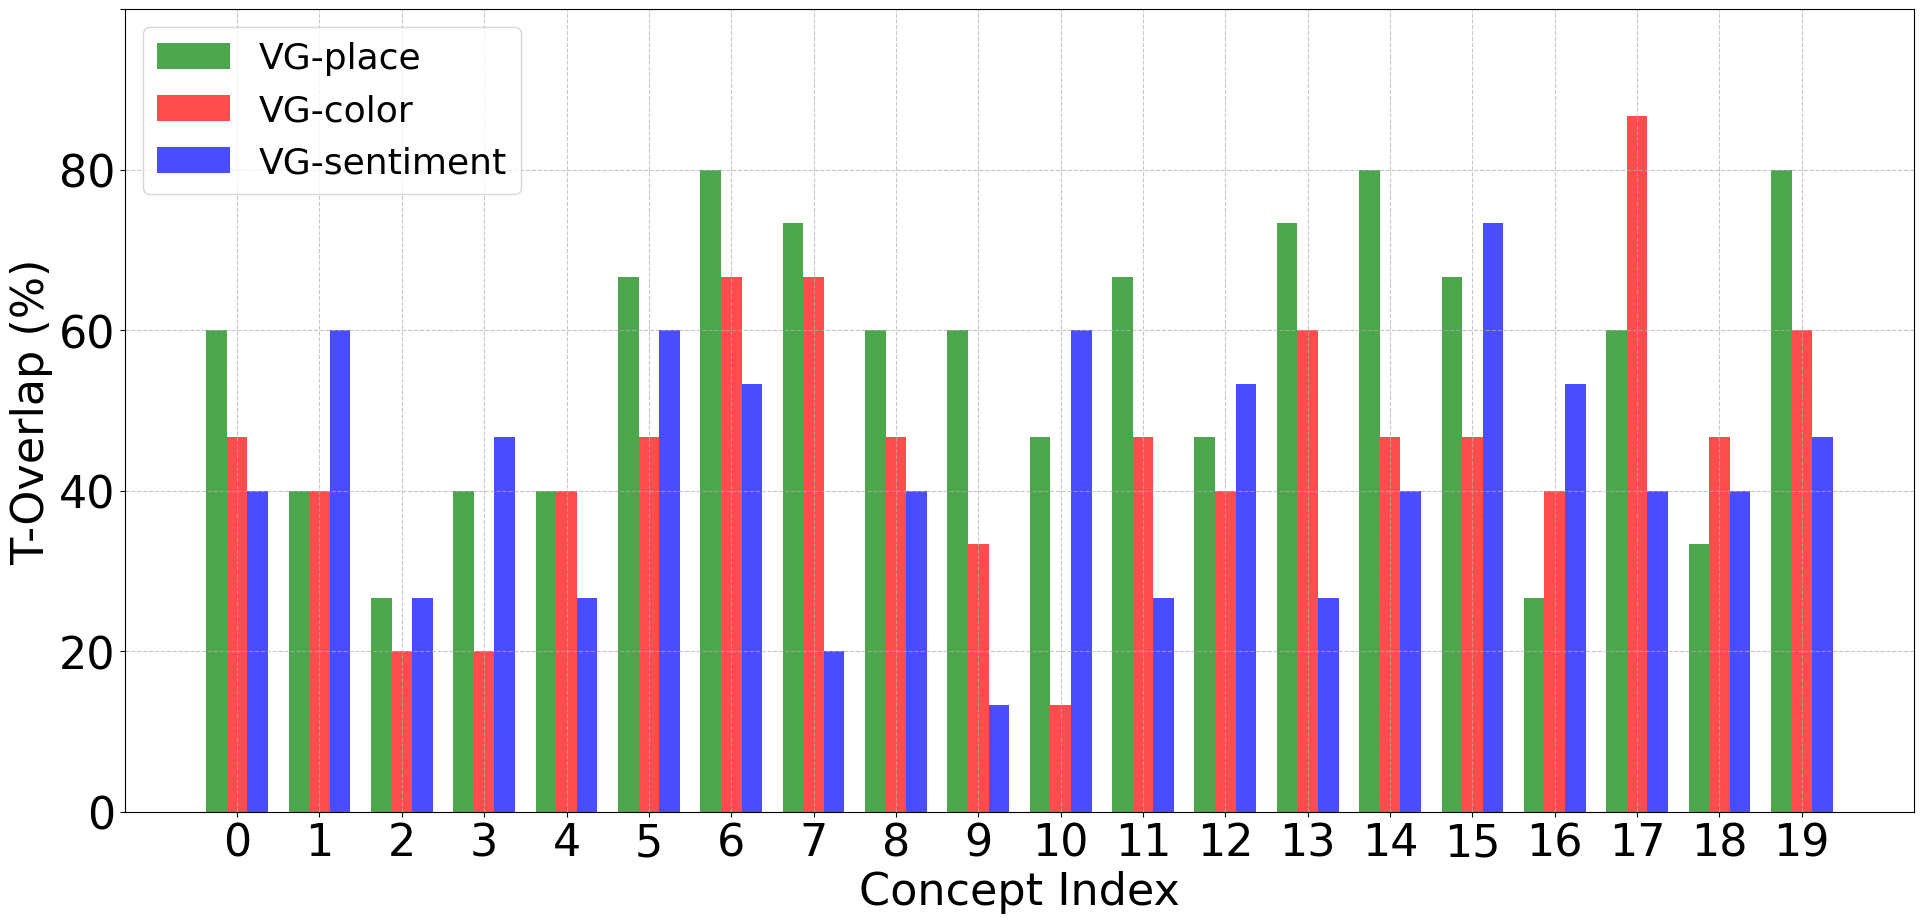

In [5]:
N = len(loaded_analysis[0]["recovery_metrics"]["word_intersection_original"])
indices = np.arange(N)

bar_width = 0.5
coef = 1/2

figsize = (20, 10)
fig, ax = plt.subplots(figsize=figsize)


ax.bar(indices - bar_width / 2, np.array(loaded_analysis[0]["recovery_metrics"]["word_intersection_original"])*100/15, width=bar_width * coef, 
       label='VG-place', color='green', alpha=0.7)
ax.bar(indices, np.array(loaded_analysis[1]["recovery_metrics"]["word_intersection_original"])*100/15, width=bar_width * coef, 
       label='VG-color', color='red', alpha=0.7)
ax.bar(indices + bar_width / 2, np.array(loaded_analysis[2]["recovery_metrics"]["word_intersection_original"])*100/15, width=bar_width * coef, 
       label='VG-sentiment', color='blue', alpha=0.7)


ax.set_xlabel('Concept Index')
ax.set_ylabel('T-Overlap (%)')
ax.set_ylim(0, 100)
ax.set_yticklabels(np.arange(0,100,20))
ax.set_xticks(indices)
ax.set_xticklabels(np.arange(N))

# Add grid and legend
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()

## Recovery of words when adding shift vectors to original concepts

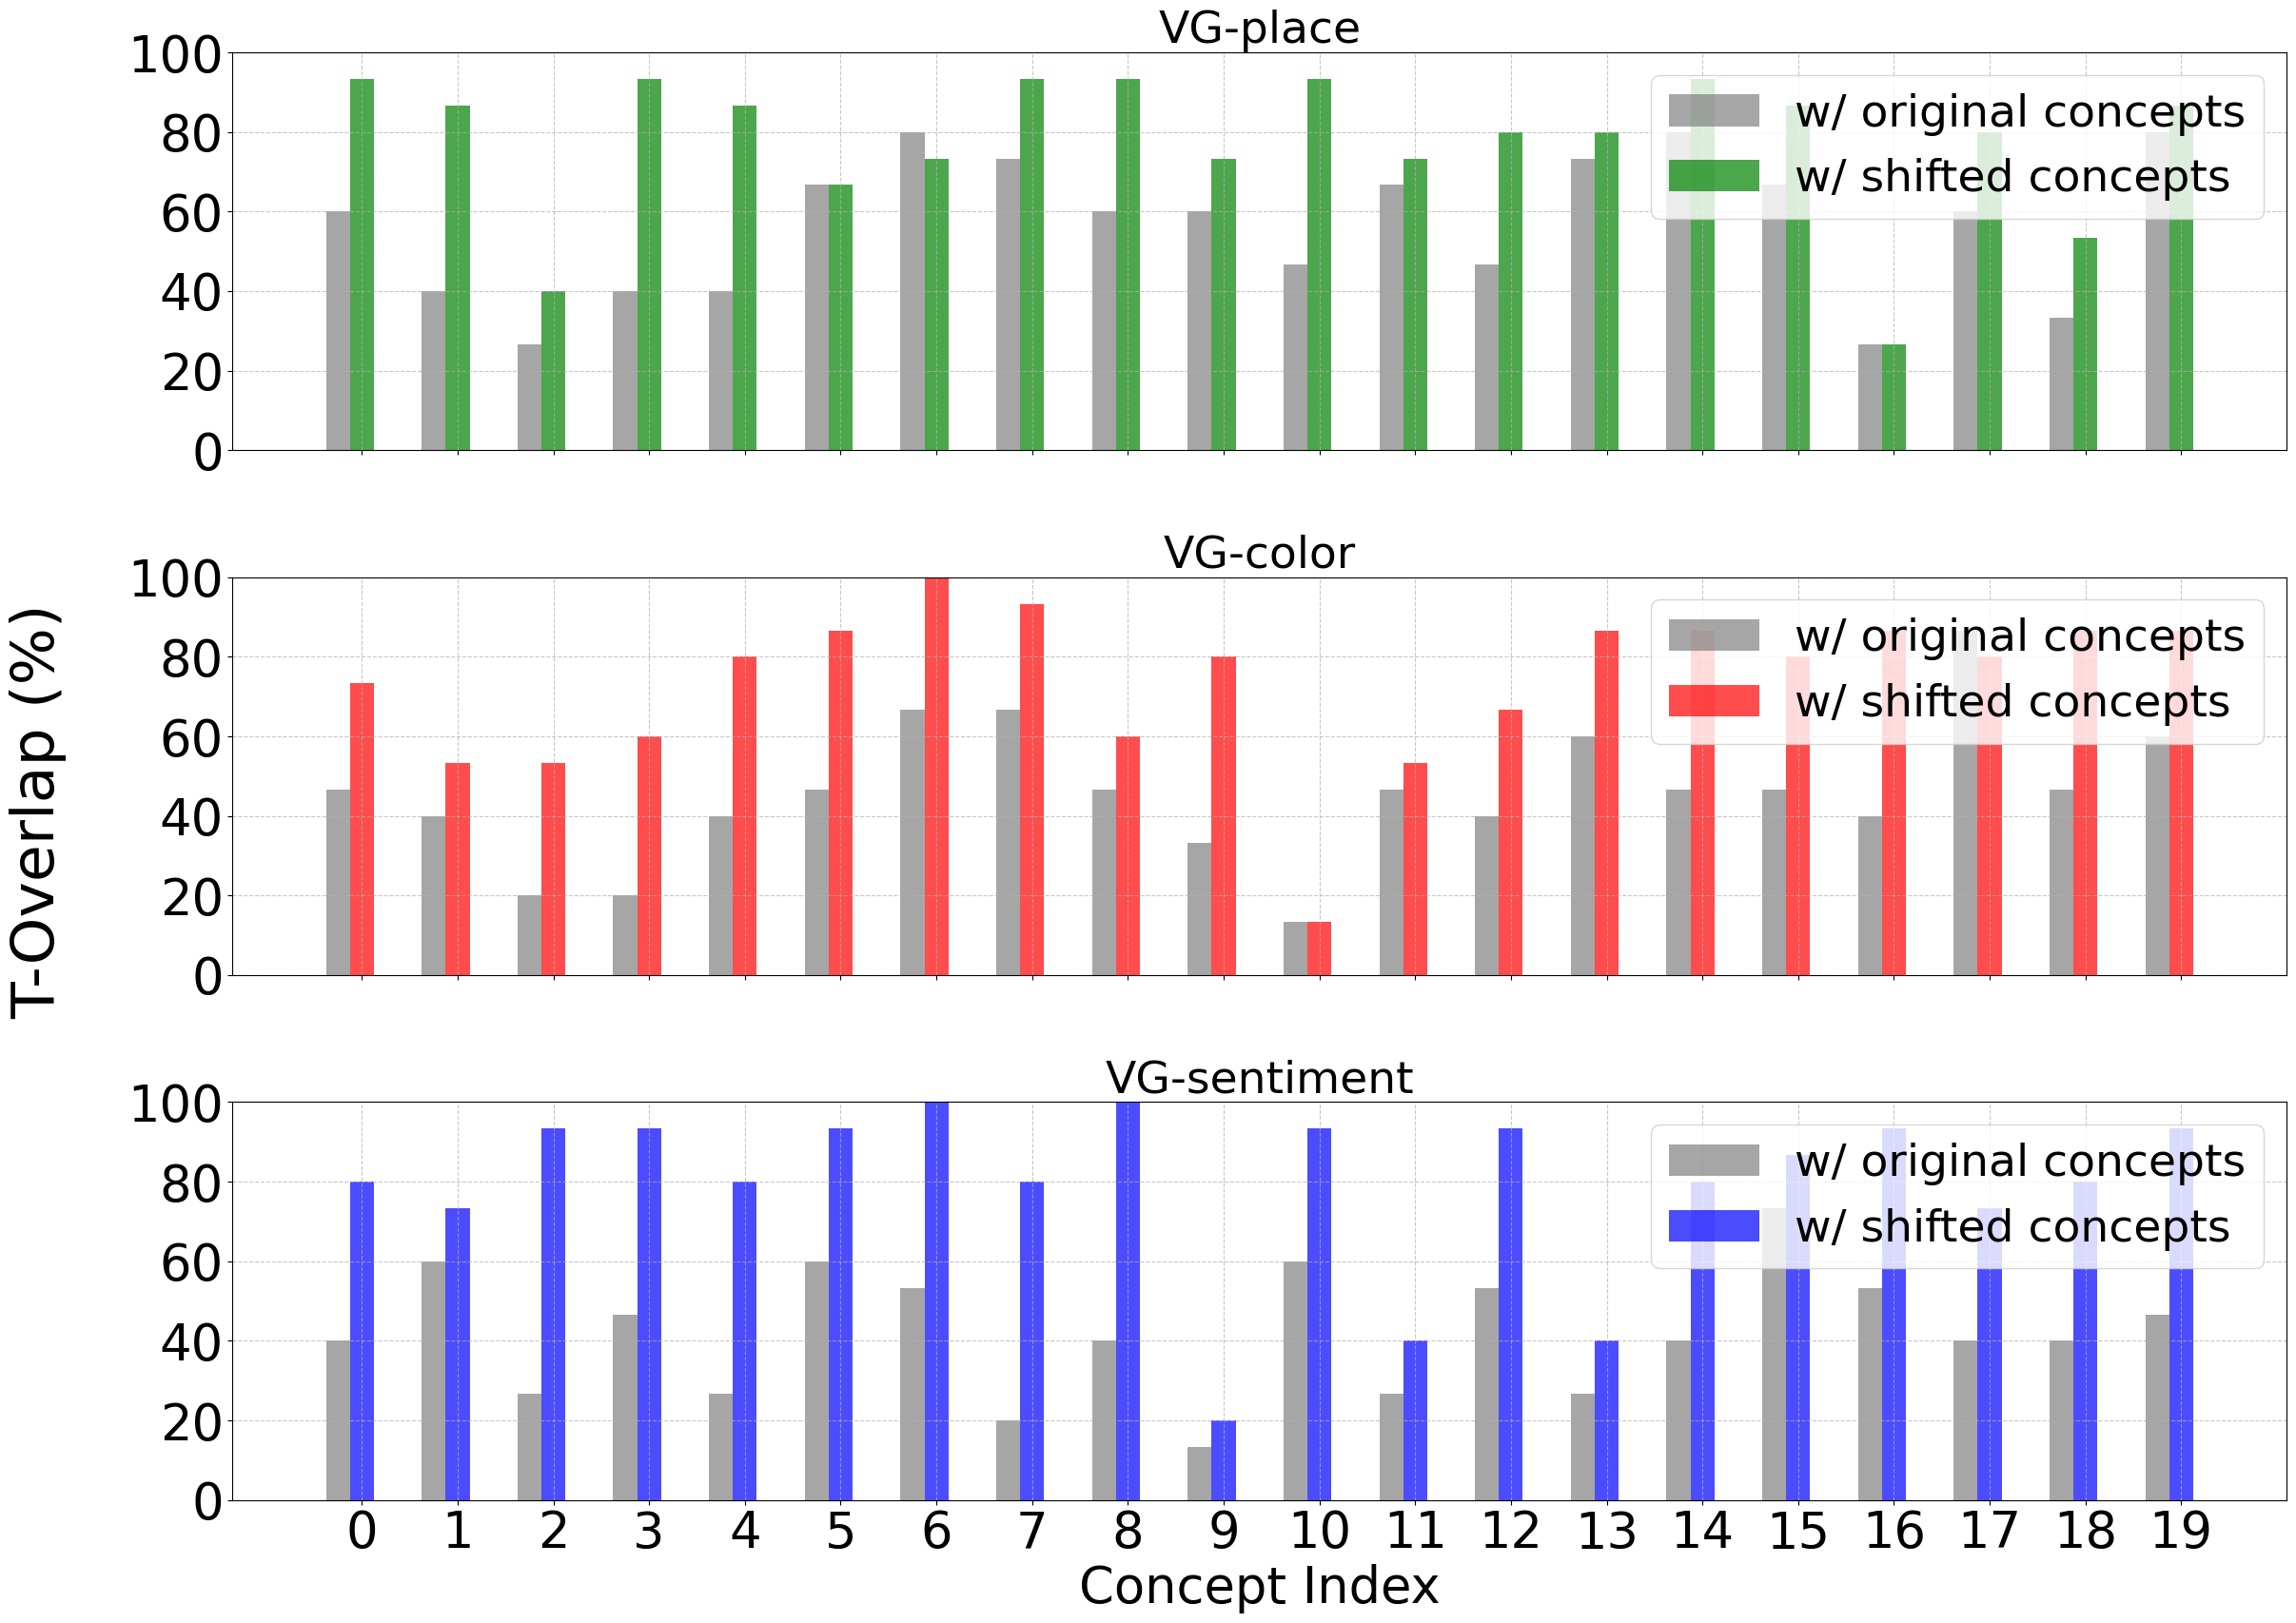

In [6]:
transparency = 0.7
N = len(loaded_analysis[0]["recovery_metrics"]["word_intersection_original"])
indices = np.arange(N)



figsize = (25, 18)
bar_width = 0.5

plt.rcParams.update({
    'font.size': 38,            # General font size
    'axes.titlesize': 34,       # Title font size
    'legend.fontsize': 34,      # Font size for legend text
    'lines.linewidth': 3,       # Line width for all plots
    'lines.markersize': 14,     # Marker size for all plots
    "text.usetex": False,
})

fig, axs = plt.subplots(3, 1, figsize=figsize, sharex=True)



# Plot VG-place
axs[0].bar(indices, np.array(loaded_analysis[0]["recovery_metrics"]["word_intersection_original"])*100/15, width=bar_width/2, color='gray', alpha=transparency, label='w/ original concepts')
axs[0].bar(indices+bar_width/2, np.array(loaded_analysis[0]["recovery_metrics"]["word_intersection_shifted"])*100/15, width=bar_width/2, color='green', alpha=transparency, label='w/ shifted concepts')
axs[0].set_yticks([0, 20, 40, 60, 80, 100])
axs[0].set_ylim(0, 100)  # Set y-axis to range from 0 to 100
axs[0].set_title('VG-place')
axs[0].grid(axis='x', linestyle='--', alpha=0.7)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].legend(loc='upper right')


# Plot VG-color
axs[1].bar(indices, np.array(loaded_analysis[1]["recovery_metrics"]["word_intersection_original"])*100/15, color='gray', width=bar_width/2, alpha=transparency, label='w/ original concepts')
axs[1].bar(indices+bar_width/2, np.array(loaded_analysis[1]["recovery_metrics"]["word_intersection_shifted"])*100/15, color='red', width=bar_width/2, alpha=transparency, label='w/ shifted concepts')
axs[1].set_xticks(indices + bar_width / 2)
axs[1].set_xticklabels(np.arange(N))
axs[1].set_yticks([0, 20, 40, 60, 80, 100])
axs[1].set_ylim(0, 100)
axs[1].grid(axis='x', linestyle='--', alpha=0.7)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_title('VG-color')
axs[1].legend(loc='upper right')



# Plot VG-sentiment
axs[2].bar(indices, np.array(loaded_analysis[2]["recovery_metrics"]["word_intersection_original"])*100/15, color='gray', width=bar_width/2, alpha=transparency, label='w/ original concepts')
axs[2].bar(indices+bar_width/2, np.array(loaded_analysis[2]["recovery_metrics"]["word_intersection_shifted"])*100/15, color='blue', width=bar_width/2, alpha=transparency, label='w/ shifted concepts')
axs[2].set_yticks([0, 20, 40, 60, 80, 100])
axs[2].set_ylim(0, 100)
axs[2].set_title('VG-sentiment')
axs[2].set_xlabel('Concept Index')
axs[2].grid(axis='x', linestyle='--', alpha=0.7)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
axs[2].legend(loc='upper right')

fig.supylabel('T-Overlap (%)')


plt.tight_layout()
plt.show()



## Correlation of recovery and shift consistency

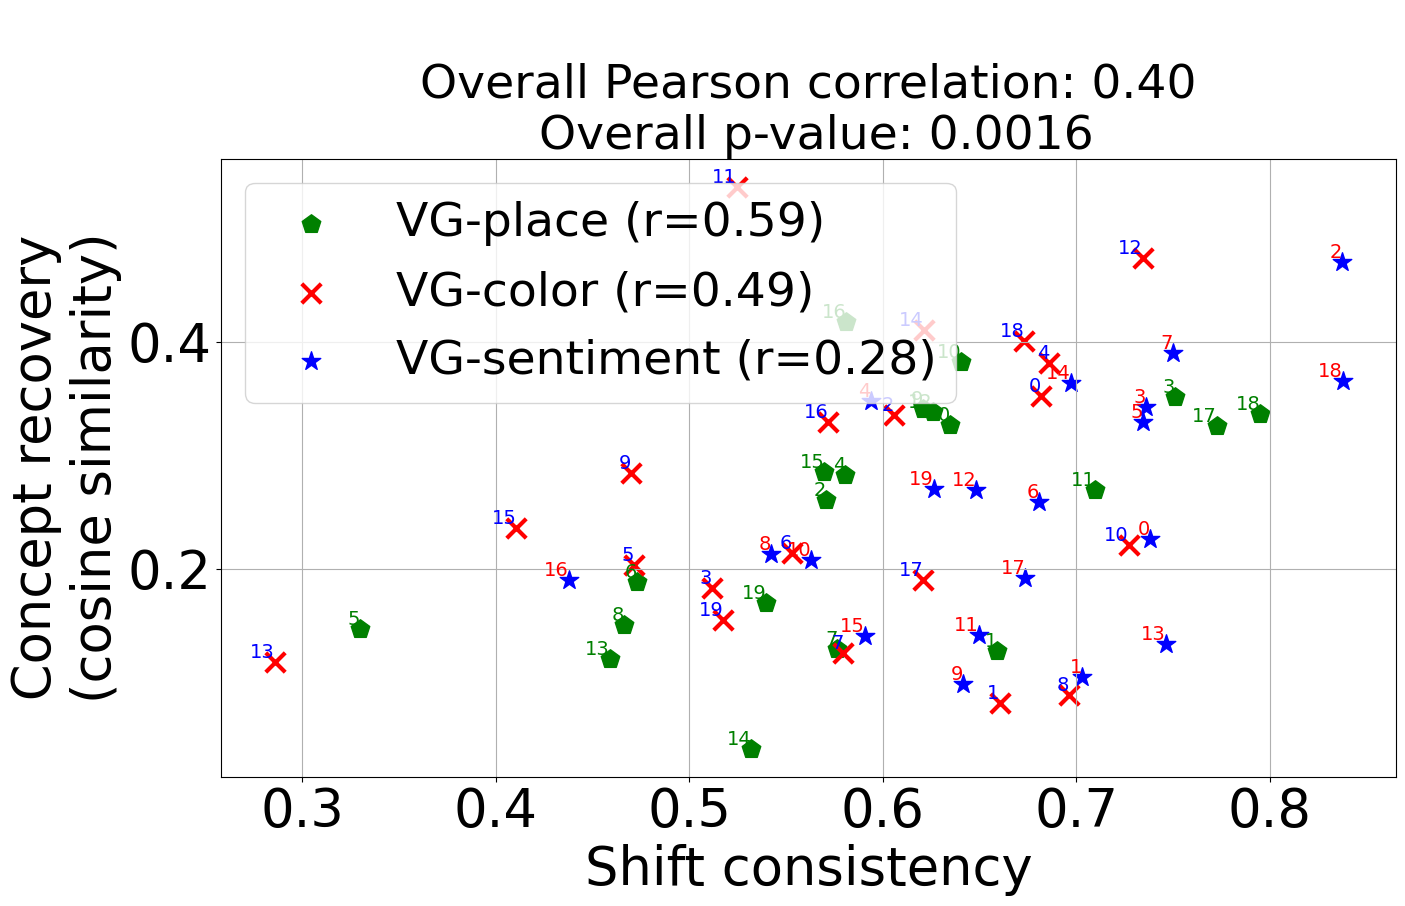

In [7]:
x_values_1 = np.array(loaded_analysis[0]["shift_stats"]['cosine_sim_scores'])
x_values_2 = np.array(loaded_analysis[1]["shift_stats"]['cosine_sim_scores'])
x_values_3 = np.array(loaded_analysis[2]["shift_stats"]['cosine_sim_scores'])


y_values_1 = np.array(np.array(loaded_analysis[0]["recovery_metrics"]['normalized_improved_cosine']))
y_values_2 = np.array(np.array(loaded_analysis[1]["recovery_metrics"]['normalized_improved_cosine']))
y_values_3 = np.array(np.array(loaded_analysis[2]["recovery_metrics"]['normalized_improved_cosine']))


correlation_1, p_value_1 = pearsonr(x_values_1, y_values_1)
correlation_2, p_value_2 = pearsonr(x_values_2, y_values_2)
correlation_3, p_value_3 = pearsonr(x_values_3, y_values_3)


all_x_values = np.concatenate([x_values_1, x_values_2, x_values_3])
all_y_values = np.concatenate([y_values_1, y_values_2, y_values_3])

overall_correlation, overall_p_value = pearsonr(all_x_values, all_y_values)


figsize=(15, 10)
fig, ax = plt.subplots(1, 1, figsize=figsize, sharex=True)


ax.scatter(x_values_1, y_values_1, color='green', marker='p', label=f'VG-place (r={correlation_1:.2f})')
ax.scatter(x_values_2, y_values_2, color='red', marker='x', label=f'VG-color (r={correlation_3:.2f})')
ax.scatter(x_values_3, y_values_3, color='blue', marker='*', label=f'VG-sentiment (r={correlation_2:.2f})')

plt.title(f"\n Overall Pearson correlation: {overall_correlation:.2f} \n Overall p-value: {overall_p_value:.4f}")
plt.xlabel(f"Shift consistency")
plt.ylabel(f" Concept recovery \n(cosine similarity)")
ax.legend()
ax.grid(True)

for i, (x, y) in enumerate(zip(x_values_1, y_values_1)):
    ax.text(x, y, f'{i}', fontsize=14, ha='right', va='bottom', color='green')
for i, (x, y) in enumerate(zip(x_values_2, y_values_2)):
    ax.text(x, y, f'{i}', fontsize=14, ha='right', va='bottom', color='blue')
for i, (x, y) in enumerate(zip(x_values_3, y_values_3)):
    ax.text(x, y, f'{i}', fontsize=14, ha='right', va='bottom', color='red')

plt.tight_layout()
plt.show()


## Correlation of recovery and shift vector magnitude + Correlation of shift vector magnitude and shift consistency

[58.28 43.8  46.66 69.7  53.5  34.72 41.16 41.22 41.88 56.47 60.3  61.72
 55.84 40.72 50.2  53.44 52.94 70.   64.75 48.4 ]


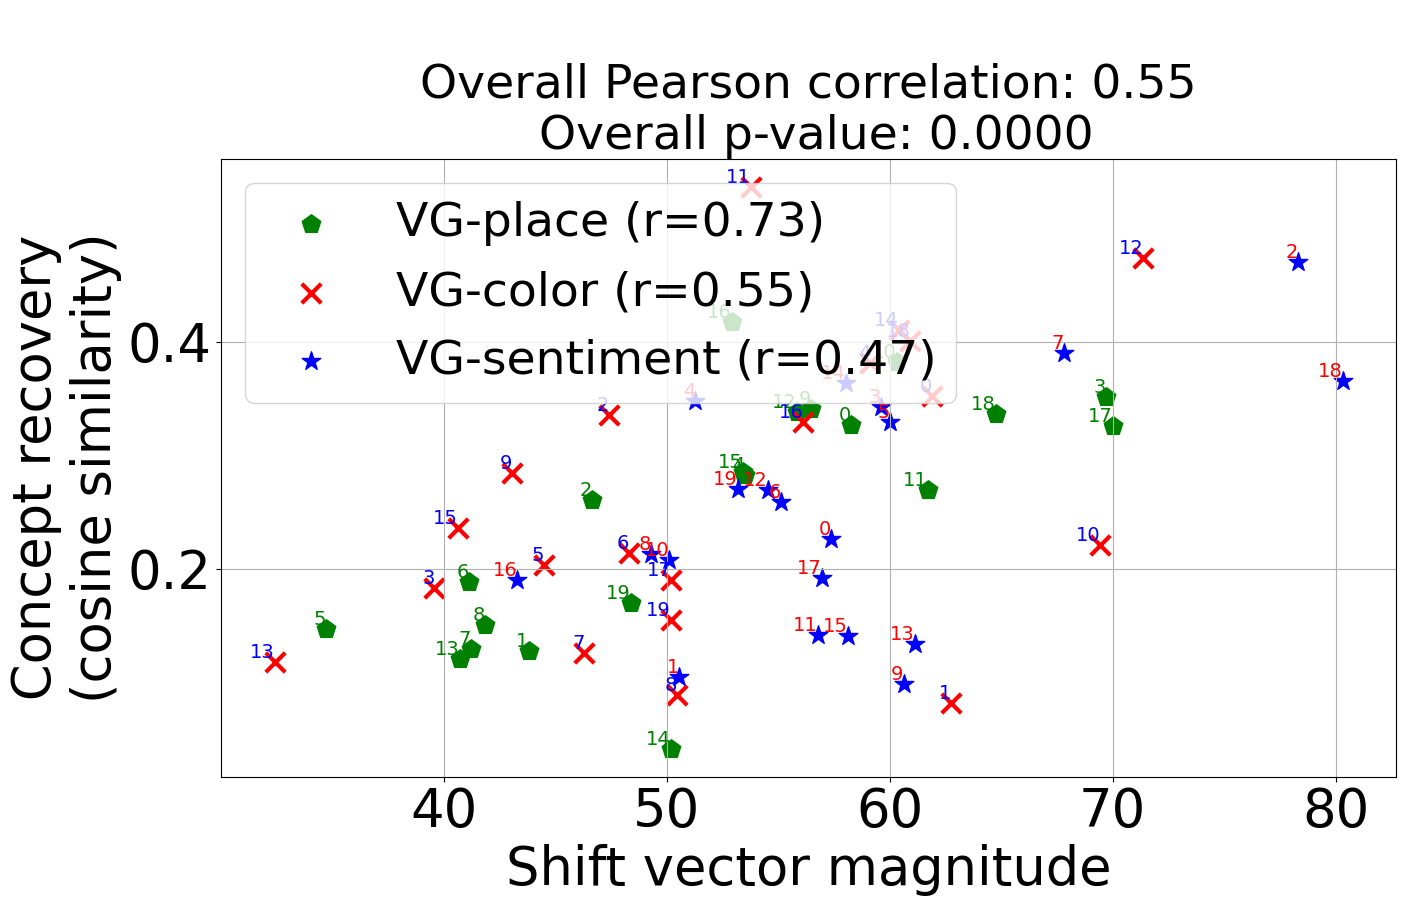

In [8]:
x_values_1 = np.array(loaded_analysis[0]["shift_stats"]['mag_mean_shift_score'])
x_values_2 = np.array(loaded_analysis[1]["shift_stats"]['mag_mean_shift_score'])
x_values_3 = np.array(loaded_analysis[2]["shift_stats"]['mag_mean_shift_score'])
print(x_values_1)

y_values_1 = np.array(np.array(loaded_analysis[0]["recovery_metrics"]['normalized_improved_cosine']))
y_values_2 = np.array(np.array(loaded_analysis[1]["recovery_metrics"]['normalized_improved_cosine']))
y_values_3 = np.array(np.array(loaded_analysis[2]["recovery_metrics"]['normalized_improved_cosine']))



correlation_1, p_value_1 = pearsonr(x_values_1, y_values_1)
correlation_2, p_value_2 = pearsonr(x_values_2, y_values_2)
correlation_3, p_value_3 = pearsonr(x_values_3, y_values_3)



all_x_values = np.concatenate([x_values_1, x_values_2, x_values_3])
all_y_values = np.concatenate([y_values_1, y_values_2, y_values_3])

overall_correlation, overall_p_value = pearsonr(all_x_values, all_y_values)


figsize=(15, 10)
fig, ax = plt.subplots(1, 1, figsize=figsize, sharex=True)


ax.scatter(x_values_1, y_values_1, color='green', marker='p', label=f'VG-place (r={correlation_1:.2f})')
ax.scatter(x_values_2, y_values_2, color='red', marker='x', label=f'VG-color (r={correlation_3:.2f})')
ax.scatter(x_values_3, y_values_3, color='blue', marker='*', label=f'VG-sentiment (r={correlation_2:.2f})')

plt.title(f"\n Overall Pearson correlation: {overall_correlation:.2f} \n Overall p-value: {overall_p_value:.4f}")
plt.xlabel(f"Shift vector magnitude")
plt.ylabel(f" Concept recovery \n(cosine similarity)")
ax.legend()
ax.grid(True)

for i, (x, y) in enumerate(zip(x_values_1, y_values_1)):
    ax.text(x, y, f'{i}', fontsize=14, ha='right', va='bottom', color='green')
for i, (x, y) in enumerate(zip(x_values_2, y_values_2)):
    ax.text(x, y, f'{i}', fontsize=14, ha='right', va='bottom', color='blue')
for i, (x, y) in enumerate(zip(x_values_3, y_values_3)):
    ax.text(x, y, f'{i}', fontsize=14, ha='right', va='bottom', color='red')

plt.tight_layout()
plt.show()


In [ ]:
x_values_1 = np.array(loaded_analysis[0]["shift_stats"]['mag_mean_shift_score'])
x_values_2 = np.array(loaded_analysis[1]["shift_stats"]['mag_mean_shift_score'])
x_values_3 = np.array(loaded_analysis[2]["shift_stats"]['mag_mean_shift_score'])
print(x_values_1)

y_values_1 = np.array(np.array(loaded_analysis[0]["recovery_metrics"]['normalized_improved_cosine']))
y_values_2 = np.array(np.array(loaded_analysis[1]["recovery_metrics"]['normalized_improved_cosine']))
y_values_3 = np.array(np.array(loaded_analysis[2]["recovery_metrics"]['normalized_improved_cosine']))



correlation_1, p_value_1 = pearsonr(x_values_1, y_values_1)
correlation_2, p_value_2 = pearsonr(x_values_2, y_values_2)
correlation_3, p_value_3 = pearsonr(x_values_3, y_values_3)



all_x_values = np.concatenate([x_values_1, x_values_2, x_values_3])
all_y_values = np.concatenate([y_values_1, y_values_2, y_values_3])

overall_correlation, overall_p_value = pearsonr(all_x_values, all_y_values)


figsize=(15, 10)
fig, ax = plt.subplots(1, 1, figsize=figsize, sharex=True)


ax.scatter(x_values_1, y_values_1, color='green', marker='p', label=f'VG-place (r={correlation_1:.2f})')
ax.scatter(x_values_2, y_values_2, color='red', marker='x', label=f'VG-color (r={correlation_3:.2f})')
ax.scatter(x_values_3, y_values_3, color='blue', marker='*', label=f'VG-sentiment (r={correlation_2:.2f})')

plt.title(f"\n Overall Pearson correlation: {overall_correlation:.2f} \n Overall p-value: {overall_p_value:.4f}")
plt.xlabel(f"Shift vector magnitude")
plt.ylabel(f" Concept recovery \n(cosine similarity)")
ax.legend()
ax.grid(True)

for i, (x, y) in enumerate(zip(x_values_1, y_values_1)):
    ax.text(x, y, f'{i}', fontsize=14, ha='right', va='bottom', color='green')
for i, (x, y) in enumerate(zip(x_values_2, y_values_2)):
    ax.text(x, y, f'{i}', fontsize=14, ha='right', va='bottom', color='blue')
for i, (x, y) in enumerate(zip(x_values_3, y_values_3)):
    ax.text(x, y, f'{i}', fontsize=14, ha='right', va='bottom', color='red')

plt.tight_layout()
plt.show()
